# Test andes - ZIP load change
```
Note: only constant PQ load can be directly changed

For example, if comment out load settings in line [20], GENROW w remain unchanged after modifying 'Ppf' of load

use 'Toggler' for ZIP load change
```

Some observations:

Constant PQ load have 'J' frequency response <br>
Constant ZIP load has 'L' frequency response -- comment out line [40]

In [43]:
import andes
import os
import pandas as pd
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.6.5.post4.dev0+gae11a531
Pandapower version: 2.8.0


In [44]:
# get andes case from excel
dir_path = os.path.abspath('..')
case_path = '/Test_ieee14_base/ieee14_base_ZIPload.xlsx'
case = dir_path + case_path

ssa = andes.load(case,
                 setup=False,
                 no_output=True,
                 default_config=True)

In [45]:
# set load as constant load
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0
ssa.PQ.pq2z = 0

# Turn on numba to accelerate TDS
ssa.config.numba

0

In [46]:
ssa.setup()
ssa.PFlow.run()

ssa.TDS.config.tf = 20.0
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

<Toggler 3>: PQ.PQ_12 status changed to 1 at t=1.0 sec.


True

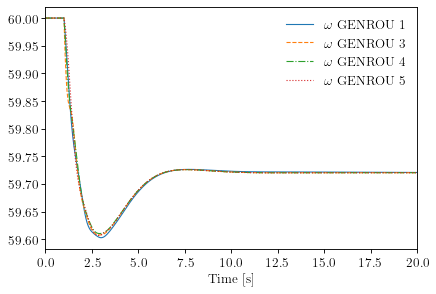

(<Figure size 480x320 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [47]:
ssa.TDS.load_plotter()

ssa.TDS.plt.plot(ssa.GENROU.omega,
                a=(0, 2, 3, 4),
                ytimes=60,
               )

Singular matrix. Case is not solvable
/Users/buxinshe/Documents/git-repo/andes/andes/routines/eig.py:224: LinAlgWarning: Ill-conditioned matrix (rcond=2.78707e-18): result may not be accurate.
  WT = solve(N, Weye, overwrite_b=True)


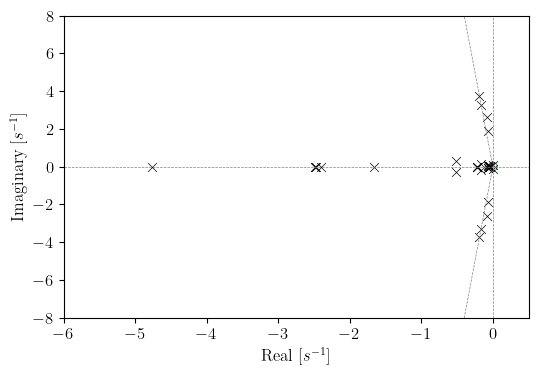

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [48]:
ssa.EIG.run()
ssa.EIG.plot()